In [1]:
import Harris
import iamge_operations
import SIFT
import matching
import numpy as np
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [4]:
file_='pic1'
picture1_path="data\pic1\Yosemite1.jpg"
picture2_path="data\pic1\Yosemite2.jpg"
key_point_image1_path="data"+"\\"+file_+"\\"+"kp1_image.jpg"
key_point_image2_path="data"+"\\"+file_+"\\"+"kp2_image.jpg"
match_NNDR_path="data"+"\\"+file_+"\\"+"Matches_NNDR.png"
match_NNDR_RANSAC_path="data"+"\\"+file_+"\\"+"Matches_RANSAC.png"

In [3]:
#读取图片
pic1=cv2.imread(picture1_path)
pic2=cv2.imread(picture2_path)
pic1_matric=cv2.cvtColor(pic1, cv2.COLOR_BGR2GRAY)#将图片转换为灰度图
pic2_matric=cv2.cvtColor(pic2, cv2.COLOR_BGR2GRAY)#将图片转换为灰度图

In [4]:
#角点检测
kp1,kp1_image=Harris.harris_detection(pic1)
kp2,kp2_image=Harris.harris_detection(pic2)
print(len(kp1))
print(len(kp2))

Harris角点检测
Harris角点检测完毕
Harris角点检测
Harris角点检测完毕
198
212


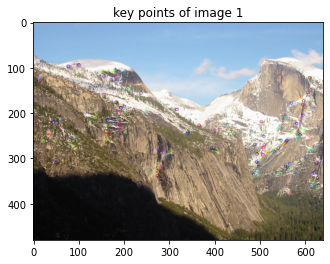

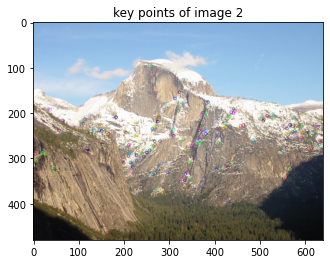

In [5]:
#展示角点检测图
iamge_operations.image_save(kp1_image,key_point_image1_path)
iamge_operations.image_save(kp2_image,key_point_image2_path)
#显示图片
plt.figure(1)
plt.imshow(Image.open(key_point_image1_path))
plt.title("key points of image 1")
plt.show()
#显示图片
plt.figure(2)
plt.imshow(Image.open(key_point_image2_path))
plt.title("key points of image 2")
plt.show()

In [6]:
#产生SIFT描述子
descriptions_1,key_points_xy_1=SIFT.feature_description(image_matrix=pic1_matric,key_points=kp1)
descriptions_2,key_points_xy_2=SIFT.feature_description(image_matrix=pic2_matric,key_points=kp1)
print(len(descriptions_1))
print(len(descriptions_2))
#print(key_points_xy_1)

产生SIFT算子


d:\大三上课程\计算机视觉\project3\Harris-SIFT-Algorithm\SIFT.py:11: RuntimeWarning: overflow encountered in ubyte_scalars
  m=np.sqrt(np.square(image_matrix[x+1,y]-image_matrix[x-1,y])+np.square(image_matrix[x,y+1]-image_matrix[x,y-1]))
d:\大三上课程\计算机视觉\project3\Harris-SIFT-Algorithm\SIFT.py:12: RuntimeWarning: overflow encountered in ubyte_scalars
  theta=np.arctan2(image_matrix[x+1,y]-image_matrix[x-1,y],image_matrix[x,y+1]-image_matrix[x,y-1])
d:\大三上课程\计算机视觉\project3\Harris-SIFT-Algorithm\SIFT.py:48: RuntimeWarning: invalid value encountered in true_divide
  descriptor=np.divide(descriptor, normal)
d:\大三上课程\计算机视觉\project3\Harris-SIFT-Algorithm\SIFT.py:58: RuntimeWarning: invalid value encountered in true_divide
  threshold_descriptor = np.divide(threshold_descriptor, normal_again)


产生SIFT算子完成
产生SIFT算子
产生SIFT算子完成
198
198


In [7]:
#NNDR匹配
best_match,best_match_pos=matching.matching_NNDR(descriptions_1,descriptions_2,key_points_xy_1,key_points_xy_2,threshold=0.9)
print(len(best_match_pos))

NNDR匹配ing
NNDR匹配完成
41


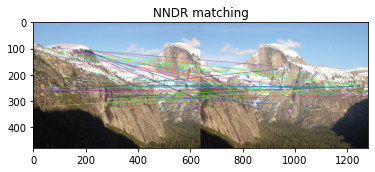

In [8]:
#保存匹配图并展示

matched_image = cv2.drawMatches(pic1, kp1, pic2, kp2, best_match,pic1,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite(match_NNDR_path, matched_image)


#matching.draw_matches(best_match_pos,pic1,pic2,match_NNDR_path)
#显示图片
plt.figure()
plt.imshow(Image.open(match_NNDR_path))
plt.title("NNDR matching")
plt.show()

In [9]:
#使用RANSAC算法优化匹配
best_matchs=matching.matching_RANSAC(best_match_pos)
print(best_matchs.shape)


RANSAC优化中
优化完毕
(7, 2, 2)


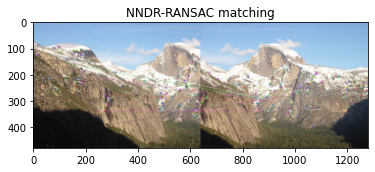

In [10]:
#绘制保存图片
matching.draw_matches(best_matchs,pic1,pic2,match_NNDR_RANSAC_path)
#显示图片
plt.figure()
plt.imshow(Image.open(match_NNDR_RANSAC_path))
plt.title("NNDR-RANSAC matching")
plt.show()

In [11]:
#不使用SIFT算子
#使用灰度值作为特征描述子
def descriptor(key_points,gray_image):
    description=[]
    for pix in key_points:
        x,y=pix[0],pix[1]
        if x>gray_image.shape[0] or y>gray_image.shape[1]:
            description.append([0])
            continue
        description.append([gray_image[x,y]])
    return description


NNDR匹配ing
NNDR匹配完成
63


d:\大三上课程\计算机视觉\project3\Harris-SIFT-Algorithm\matching.py:21: RuntimeWarning: invalid value encountered in int_scalars
  ratio_distance=d_min/d_2_min


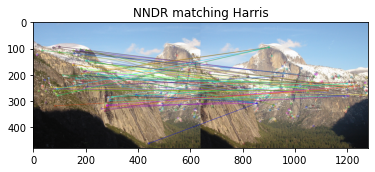

In [12]:
#不使用SIFT算子，直接使用灰度值作为特征
d1=np.array(descriptor(key_points_xy_1,pic1_matric))
d2=np.array(descriptor(key_points_xy_2,pic2_matric))
#NNDR匹配
best_match_harris,best_match_pos=matching.matching_NNDR(d1,d2,key_points_xy_1,key_points_xy_2,threshold=0.9)
print(len(best_match_pos))
#保存匹配图并展示

matched_image_harris = cv2.drawMatches(pic1, kp1, pic2, kp2, best_match_harris,pic1,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
cv2.imwrite("data\pic1\Matches_NNDR_Harris.png", matched_image_harris)


#matching.draw_matches(best_match_pos,pic1,pic2,match_NNDR_path)
#显示图片
plt.figure()
plt.imshow(Image.open("data\pic1\Matches_NNDR_Harris.png"))
plt.title("NNDR matching Harris")
plt.show()

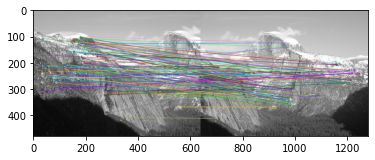

(<matplotlib.image.AxesImage at 0x18b5776f550>, None)

In [10]:
img1 = cv2.imread(picture1_path,0)          # queryImage
img2 = cv2.imread(picture2_path,0) # trainImage


orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(img1,None)
kp2, des2 = orb.detectAndCompute(img2,None)



bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

matches = bf.match(des1,des2)

matches = sorted(matches, key = lambda x:x.distance)
#绘制所有匹配点
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches, None, flags=2)
plt.imshow(img3),plt.show()

168


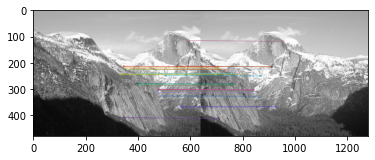

(<matplotlib.image.AxesImage at 0x18b585ac190>, None)

In [13]:
print(len(matches))
#绘制前10匹配点
img3 = cv2.drawMatches(img1,kp1,img2,kp2,matches[:43], None, flags=2)
plt.imshow(img3),plt.show()